In [1]:
import numpy as np
import os,sys,time
import matplotlib.pyplot as plt

In [147]:
root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log'
data_dir='/esat/opal/kkelchte/docker_home/pilot_data'
##### 20FPS
# log_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if d.startswith('rec_') and not '_10_' in d])
# data_dirs=sorted([data_dir+'/'+d for d in os.listdir(data_dir) if d.startswith('rec_') and not '_10_' in d])

# log_dirs=[l for dd in data_dirs for l in log_dirs if os.path.basename(l) in dd ]
# log_dirs = log_dirs[1:]
# print "log_dirs: "
# for ld in log_dirs: print ld
# print "data_dirs: "
# for dd in data_dirs: print dd
##### 10FPS
# log_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if d.startswith('rec_10_')])
# data_dirs=sorted([data_dir+'/'+d for d in os.listdir(data_dir) if d.startswith('rec_10_')])

# log_dirs=[l for dd in data_dirs for l in log_dirs if os.path.basename(l) in dd ]
# print "log_dirs: "
# for ld in log_dirs: print ld
# print "data_dirs: "
# for dd in data_dirs: print dd

##### 20FPS
log_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if d.startswith('rec_20_')])
data_dirs=sorted([data_dir+'/'+d for d in os.listdir(data_dir) if d.startswith('rec_20_')])

log_dirs=[l for dd in data_dirs for l in log_dirs if os.path.basename(l) in dd ]
print "log_dirs: "
for ld in log_dirs: print ld
print "data_dirs: "
for dd in data_dirs: print dd

assert len(log_dirs) == len(data_dirs)

log_dirs: 
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_1
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_2
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_3
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_4
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_5
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_6
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_20_7
data_dirs: 
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_1
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_2
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_3
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_4
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_5
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_6
/esat/opal/kkelchte/docker_home/pilot_data/rec_20_7


In [148]:
# extract frame rates for each run of each log dir
results={}
for index,dd in enumerate(data_dirs):
    print os.path.basename(dd)
    # extract hosts:
    import subprocess, shlex
    log_files=[log_dirs[index]+'/condor/'+f for f in os.listdir(log_dirs[index]+'/condor/') if f.endswith('log')]
    host_list=[l.split(' ')[8].split(':')[0][1:] for l in open(log_files[0],'r').readlines() if 'executing on host' in l]
    host_names=[]
    for host in host_list: host_names.append(subprocess.check_output(shlex.split('host '+host)).split(' ')[4].split('.')[0])
    for h in host_names: print h
    image_files=sorted([dd+'/'+d+'/images.txt' for d in os.listdir(dd) if os.path.isdir(dd+'/'+d) and d.startswith('0')])
    mean={'canyon':[],'forest':[],'sandbox':[],'total':[]}
    var={'canyon':[],'forest':[],'sandbox':[],'total':[]}
    for i_f in image_files:
        try:
            # i_f=image_files[0]
#             print(i_f)
            time_stamps= [ float(l.split(' ')[0].split(':')[0][:-1])+float(l.split(' ')[0].split(':')[1][:-2])*10**-9 for l in open(i_f,'r').readlines() if 'RGB' in l]
            frame_rates = [1/(time_stamps[i+1]-time_stamps[i]+0.01) if time_stamps[i] != time_stamps[i+1] else np.nan for i in range(len(time_stamps)-1)]
            if 'canyon' in i_f:
                mean['canyon'].append(np.nanmean(frame_rates))
                var['canyon'].append(np.nanvar(frame_rates))
            elif 'sandbox' in i_f:
                mean['sandbox'].append(np.nanmean(frame_rates))
                var['sandbox'].append(np.nanvar(frame_rates))
            elif 'forest' in i_f:
                mean['forest'].append(np.nanmean(frame_rates))
                var['forest'].append(np.nanvar(frame_rates))
            mean['total'].append(np.nanmean(frame_rates))
            var['total'].append(np.nanvar(frame_rates))
#             plt.subplot(1,2,1)
#             plt.hist(frame_rates)
#             plt.subplot(1,2,2)
#             plt.plot(frame_rates)
#             plt.show()
        except:
            pass
    results[os.path.basename(dd)]={'machines': host_names, 'mean':mean, 'var': var}

rec_20_1
spinel
rec_20_2
pyrite
rec_20_3
topaz
rec_20_4
realgar
rec_20_5
ena
rec_20_6
asahi
rec_20_7
estragon


In [149]:
# Print results in md table format
msg=""
for r in sorted(results.keys()):
#     print r
    msg="{0} | {1} ".format(msg, results[r]['machines'][0])
print msg,"| "
for w in "canyon", "forest", "sandbox", "total":
    msg=w+" "
    for r in sorted(results.keys()):
    #     print r
        msg="{0} | {1:0.2f} ({2:0.2f}) ".format(msg, np.nanmean(results[r]['mean'][w]), np.nanmean(results[r]['var'][w]))
    print msg,"| "


 | spinel  | pyrite  | topaz  | realgar  | ena  | asahi  | estragon  | 
canyon  | 14.05 (7.56)  | 15.53 (10.19)  | 14.08 (7.40)  | 14.50 (7.76)  | 16.92 (9.60)  | 16.98 (9.71)  | nan (nan)  | 
forest  | 13.50 (8.53)  | 14.50 (11.46)  | 13.35 (8.43)  | 13.80 (10.04)  | 16.32 (11.31)  | 16.49 (11.63)  | nan (nan)  | 
sandbox  | 13.85 (9.57)  | 15.50 (20.18)  | 13.36 (8.66)  | 14.34 (11.78)  | 17.20 (16.36)  | 15.71 (13.58)  | nan (nan)  | 
total  | 13.81 (8.53)  | 15.20 (13.65)  | 13.60 (8.16)  | 14.22 (9.80)  | 16.81 (12.42)  | 16.44 (11.50)  | nan (nan)  | 


/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


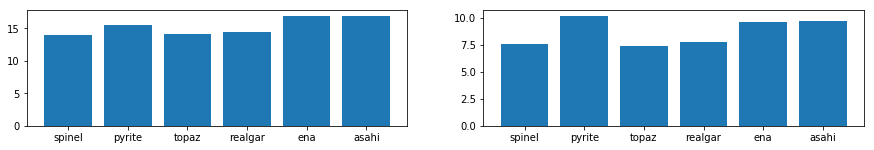

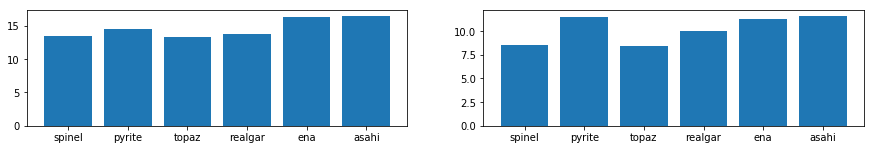

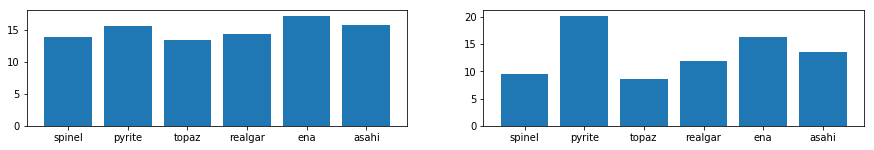

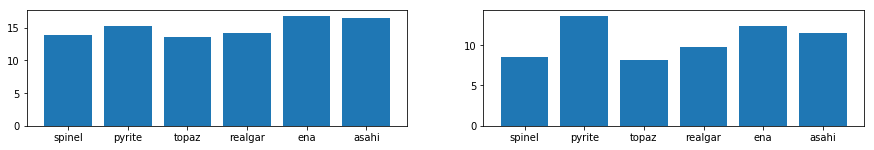

In [150]:
for i,w in enumerate(["canyon", "forest", "sandbox", "total"]):
    plt.figure(figsize=(15,20))
    plt.subplot(8,2,i*2+1)
    plt.ylim=(0,40)
    plt.bar([results[r]['machines'][0] for r in sorted(results.keys())],
           [np.mean(results[r]['mean'][w]) for r in sorted(results.keys())])
    plt.subplot(8,2,i*2+2)
    plt.ylim=(0,500)
    plt.bar([results[r]['machines'][0] for r in sorted(results.keys())],
           [np.mean(results[r]['var'][w]) for r in sorted(results.keys())])
    

plt.show()

In [151]:
results={}
# Extract frame rate by counting the average number of images saved for each environment
for index,dd in enumerate(data_dirs):
    print os.path.basename(dd)
    # extract hosts:
    import subprocess, shlex
    log_files=[log_dirs[index]+'/condor/'+f for f in os.listdir(log_dirs[index]+'/condor/') if f.endswith('log')]
    host_list=[l.split(' ')[8].split(':')[0][1:] for l in open(log_files[0],'r').readlines() if 'executing on host' in l]
    host_names=[]
    for host in host_list: host_names.append(subprocess.check_output(shlex.split('host '+host)).split(' ')[4].split('.')[0])
    for h in host_names: print h
    mean={'canyon':[],'forest':[],'sandbox':[]}
#     duration={'canyon':[],'forest':[],'sandbox':[]}
    run_dirs=[dd+'/'+rd for rd in os.listdir(dd) if rd.startswith('0')]
    for rd in run_dirs:
        try:
            begin=os.path.getmtime(rd+'/RGB/'+sorted(os.listdir(rd+'/RGB'))[0])
            end=os.path.getmtime(rd+'/RGB/'+sorted(os.listdir(rd+'/RGB'))[-1])
            if 'canyon' in rd:
                mean['canyon'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['canyon'].append(end-begin)
            elif 'sandbox' in rd:
                mean['sandbox'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['sandbox'].append(end-begin)
            elif 'forest' in rd:
                mean['forest'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['forest'].append(end-begin)
        except:
            pass
    results[os.path.basename(dd)]={'machines': host_names, 'mean':mean}

rec_20_1
spinel
rec_20_2
pyrite
rec_20_3
topaz
rec_20_4
realgar
rec_20_5
ena
rec_20_6
asahi
rec_20_7
estragon


In [152]:
# print result table wise
# Print results in md table format
msg="| "
for r in sorted(results.keys()):
#     print r
    msg="{0} | {1} ".format(msg, results[r]['machines'][0])
print msg,"| "
for w in "canyon", "forest", "sandbox":
    msg="| "+w+" "
    for r in sorted(results.keys()):
    #     print r
        msg="{0} | {1:0.2f} ({2:0.2f}) ".format(msg, np.mean(results[r]['mean'][w]), np.var(results[r]['mean'][w]))
    print msg,"| "


|  | spinel  | pyrite  | topaz  | realgar  | ena  | asahi  | estragon  | 
| canyon  | 15.27 (0.09)  | 16.94 (0.05)  | 15.31 (0.06)  | 15.94 (0.06)  | 19.13 (0.03)  | 19.22 (0.01)  | nan (nan)  | 
| forest  | 14.22 (0.39)  | 15.04 (0.91)  | 14.16 (0.47)  | 14.74 (0.41)  | 18.00 (0.08)  | 18.20 (0.06)  | nan (nan)  | 
| sandbox  | 14.79 (1.41)  | 16.17 (1.97)  | 14.16 (1.73)  | 15.24 (2.44)  | 18.93 (0.25)  | 17.06 (1.52)  | nan (nan)  | 


/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/visics/kkelchte/tensorflow/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
